# Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

### Importing Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [ ]:
df=pd.read_csv("adult.csv")

### Exploratory Data Analysis


In [3]:
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
obj_cols = ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'gender', 'native-country', 'income']

for col in obj_cols:
    print('%s: %d' % (col,len(list(df[col].unique()))))

workclass: 9
education: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
gender: 2
native-country: 42
income: 2


In [8]:
obj_cols = ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'gender', 'native-country', 'income']

for col in obj_cols:
    print('%s: %s' % (col, list(df[col].unique())))
    print("\n")

workclass: ['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']


education: ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', 'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate', '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']


marital-status: ['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse']


occupation: ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?', 'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']


relationship: ['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife', 'Other-relative']


race: ['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']


gender: ['Male', 'Female']


native-country: ['United-States', '?', 'Peru', 'Guate

In [9]:
#printing all the uncleaned values
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
occ_nan=df['occupation'].value_counts()["?"] 
work_nan=df['workclass'].value_counts()["?"] 
country_nan=df['native-country'].value_counts()["?"] 

print(occ_nan,work_nan,country_nan)

2809 2799 857


In [11]:
#Printing no of duplicate values
print(f"We have {df.duplicated().sum()} duplicate values")

We have 52 duplicate values


### Analysis

1. occupation workclass and native country have ?/ null values
2. Education coloum is not needed as education-num is numerical form of education
3. Convert marital statues in numerical form 
4. Convert gender, occupation, workclass, native country, relation and race in numerical data type
5. Converting income in binary data as there are only two catergoires of income 
6. We have 52 duplicate values we have to remove them

In [12]:
df['net_capital'] = (df['capital-gain'] - df['capital-loss']).astype(int)
df.drop(['capital-gain', 'capital-loss'], axis = 1, inplace = True)

In [13]:
x1=df['workclass'].mode()
x1

0    Private
Name: workclass, dtype: object

In [14]:
x2=df['occupation'].mode()
x2

0    Prof-specialty
Name: occupation, dtype: object

In [15]:
x3=df['native-country'].mode()
x3

0    United-States
Name: native-country, dtype: object

In [16]:
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')
df['native-country'] = df['native-country'].replace('?', 'United-States')

In [17]:
#Removing duplicate values
df = df.drop_duplicates()

In [18]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,net_capital
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,7688
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K,0


In [19]:
import warnings
warnings.filterwarnings("ignore")

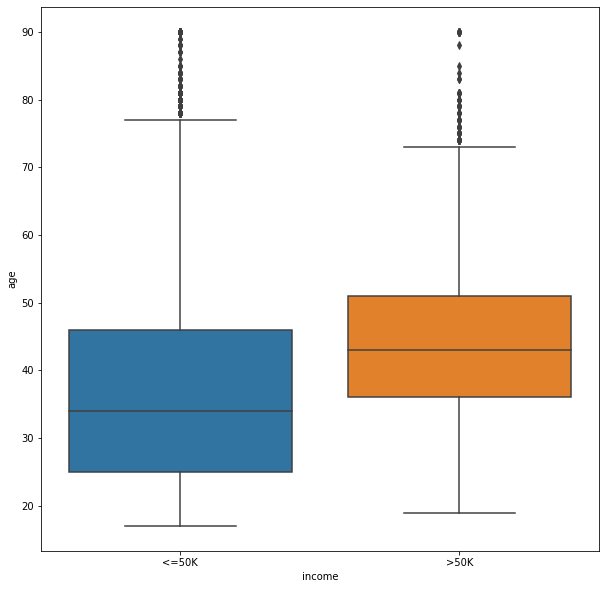

In [20]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=df)
plt.show()

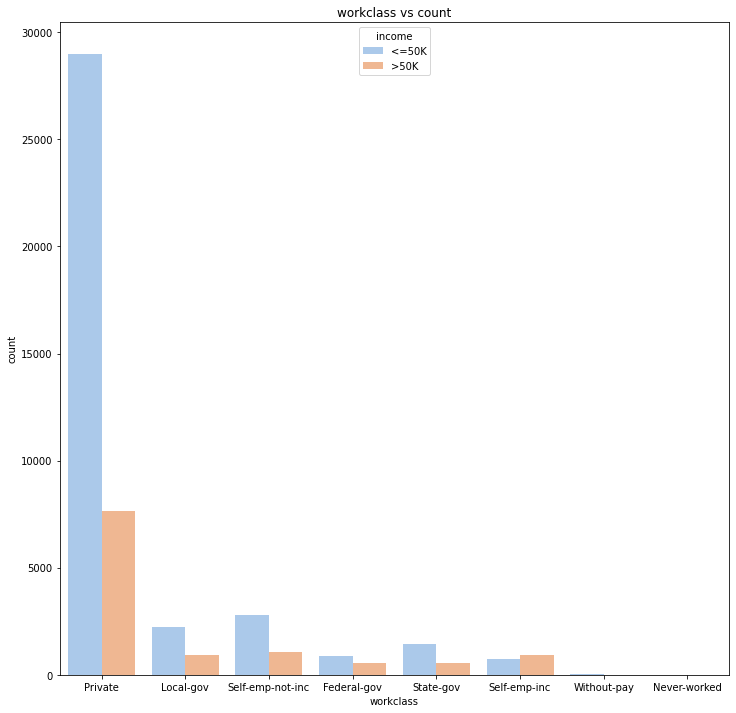

In [21]:
fig = plt.figure(figsize=(12,12)) 
ax = sns.countplot(x="workclass", hue="income", palette='pastel', data=df, ).set_title("workclass vs count")

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:xlabel='income', ylabel='count'>

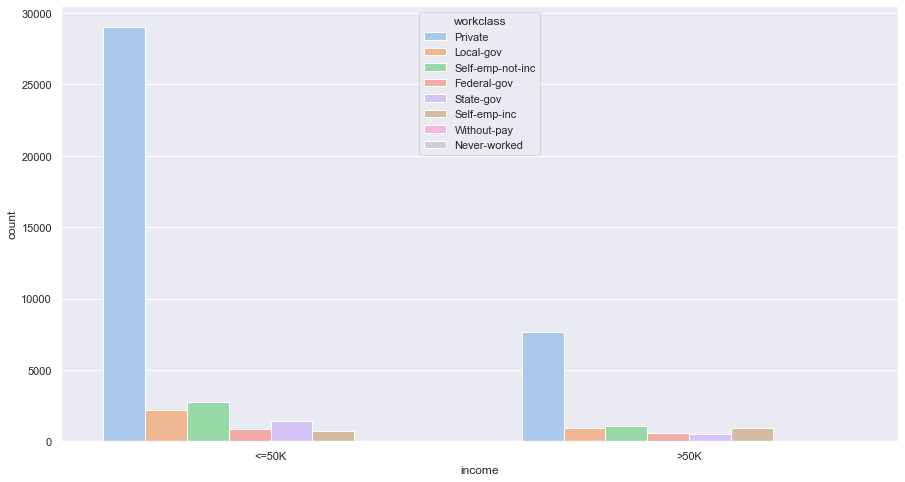

In [23]:
sns.countplot(df['income'], palette='pastel', hue='workclass', data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

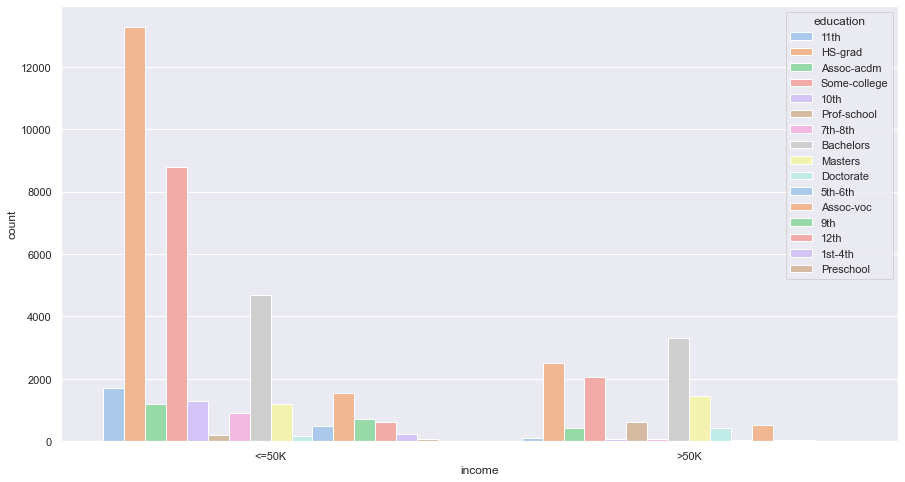

In [24]:
sns.countplot(df['income'], palette='pastel', hue='education', data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

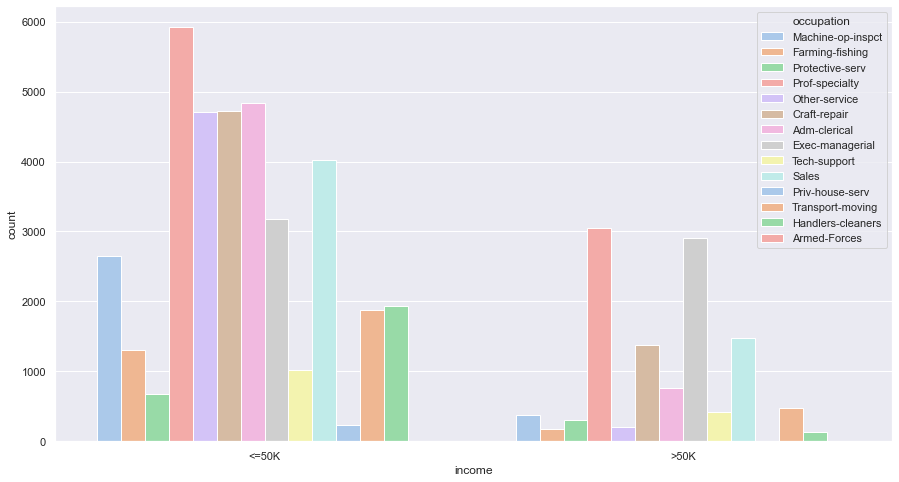

In [25]:
sns.countplot(df['income'], palette='pastel', hue='occupation', data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

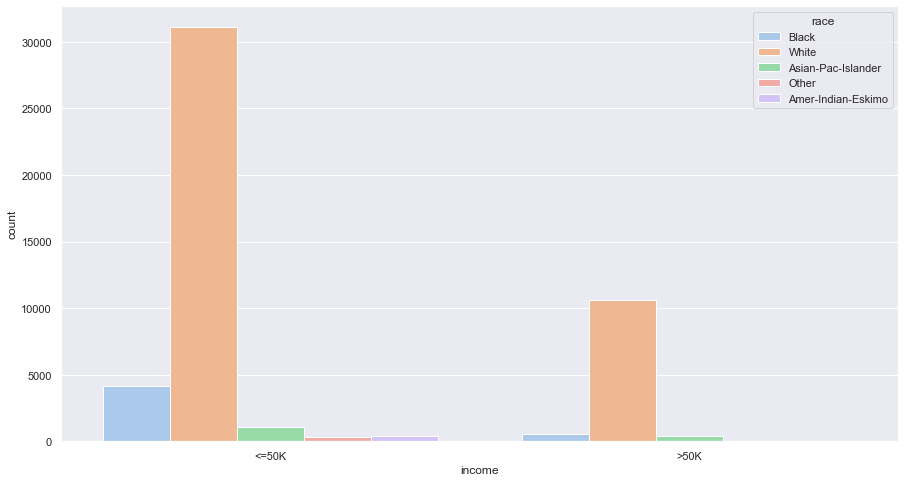

In [26]:
sns.countplot(df['income'], palette='pastel', hue='race', data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

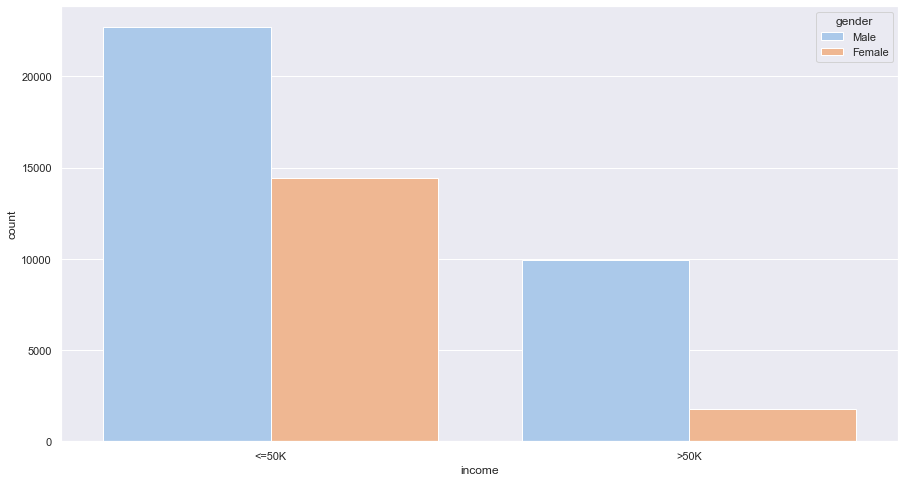

In [27]:
sns.countplot(df['income'], palette='pastel', hue='gender', data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

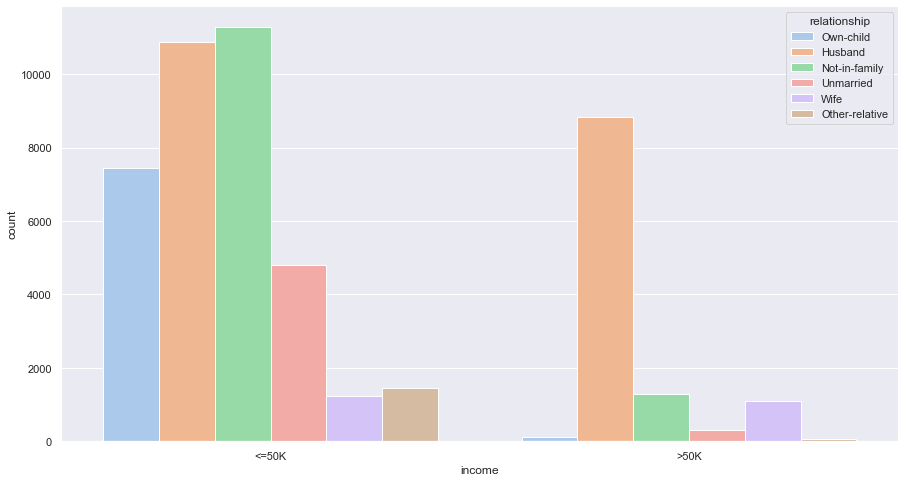

In [28]:
sns.countplot(df['income'], palette='pastel', hue='relationship', data=df)

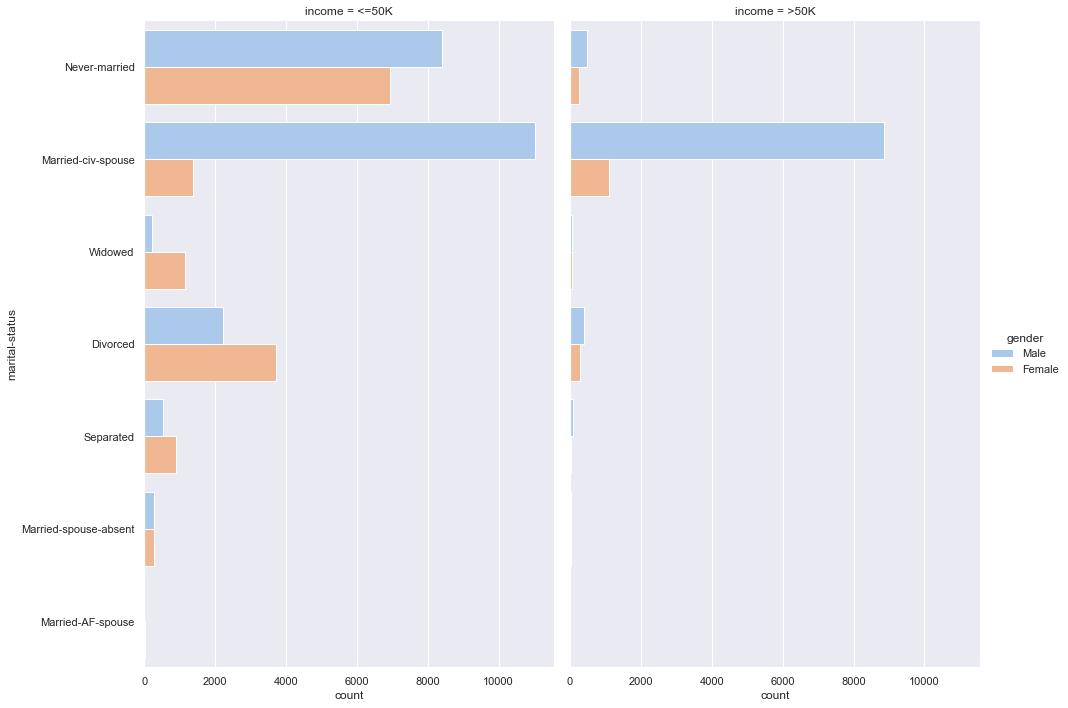

In [29]:
g = sns.catplot(y="marital-status", hue="gender", col="income",data=df, kind="count", 
                height=10, aspect=.7,palette='pastel');

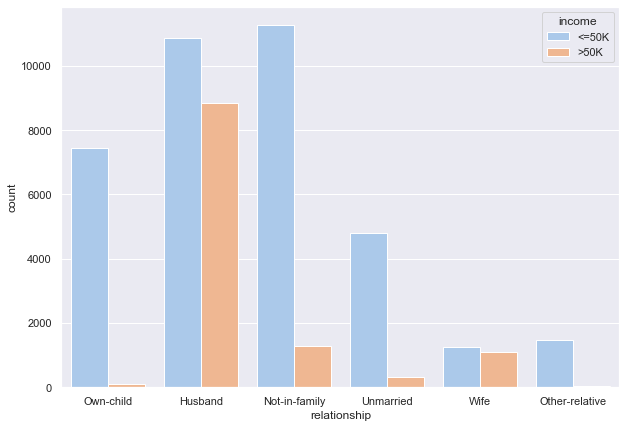

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income", data=df,palette='pastel');

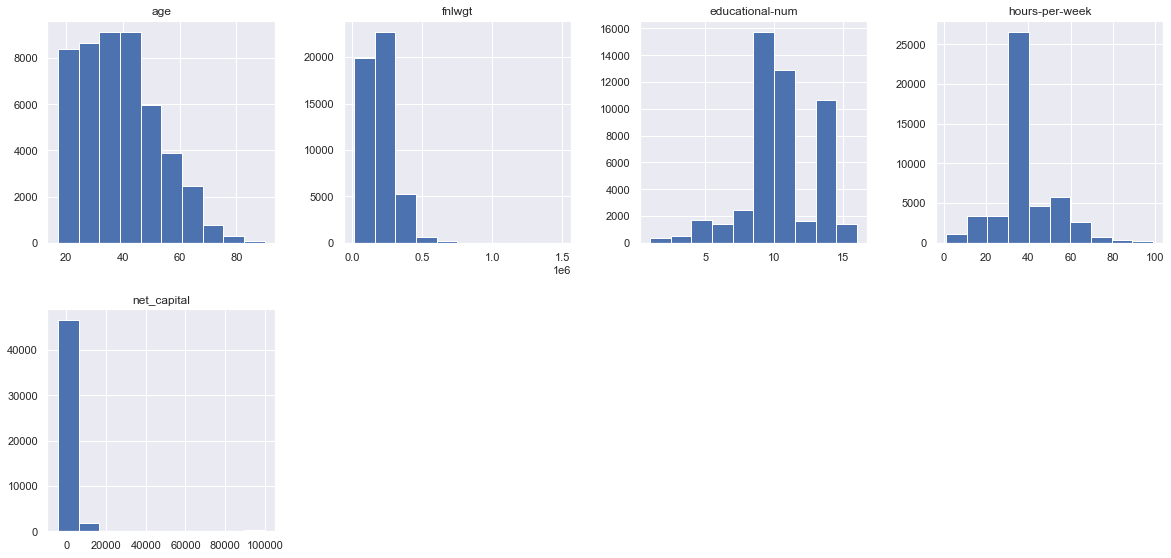

In [31]:
df.hist(figsize=(20,20), layout=(4,4), sharex=False);

## Feature Engineering

#### Encoding categorical variables

In [32]:
from sklearn import preprocessing
le1= preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [33]:
df['workclass']=le1.fit_transform(df['workclass'])
df['occupation']=le1.fit_transform(df['occupation'])
df['native-country']=le1.fit_transform(df['native-country'])
df['race']=le1.fit_transform(df['race'])
df['marital-status']=le1.fit_transform(df['marital-status'])
df['relationship']=le1.fit_transform(df['relationship'])
df['gender']=le1.fit_transform(df['gender'])
df['income']=le1.fit_transform(df['income'])

In [34]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,net_capital
0,25,3,226802,11th,7,4,6,3,2,1,40,38,0,0
1,38,3,89814,HS-grad,9,2,4,0,4,1,50,38,0,0
2,28,1,336951,Assoc-acdm,12,2,10,0,4,1,40,38,1,0
3,44,3,160323,Some-college,10,2,6,0,2,1,40,38,1,7688
4,18,3,103497,Some-college,10,4,9,3,4,0,30,38,0,0


## Model

In [35]:
df.drop('education',axis=1,inplace=True)

In [36]:
X= df.drop(['income'], axis=1)
y = df['income']

In [37]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48789, dtype: int32

#### Feature Scaling

In [38]:
df1= df.copy()
ss= StandardScaler().fit(df1.drop('income', axis=1))
X= ss.transform(df1.drop('income', axis=1))
y= df['income']

Splitting the data in 70:30 ratio as test and train to evaluate the model after training

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

#### Implementing most useful classification Models

In [40]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

gbc = GradientBoostingClassifier(learning_rate=0.56)
sgd = SGDClassifier()


gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_acc = round(accuracy_score(y_test, gbc_pred), 4)*100

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)
s1=format(lr.score(X_train, y_train))


rfc = RandomForestClassifier( max_depth=1000,min_samples_split=4,min_samples_leaf=2,random_state=27)
model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)



dt=DecisionTreeClassifier(max_depth=50)
model2 = dt.fit(X_train, y_train)
prediction1 = model1.predict(X_test)


sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
sgd_acc = round(accuracy_score(y_test, sgd_pred), 4)*100

In [41]:
print("GBC on test data:",gbc_acc)
print("SGD on test data:",sgd_acc)
print("LR on test data:  {:,.2f}".format(lr.score(X_test, y_test)*100))
print("RCF on test data: {:,.2f}".format(rfc.score(X_test, y_test)*100))
print("DT on test data:  {:,.2f}".format(dt.score(X_test, y_test)*100))

GBC on test data: 87.28
SGD on test data: 81.51
LR on test data:  81.62
RCF on test data: 86.03
DT on test data:  81.10


### The best fit model for the following data was gradient boost classifier with 87.29 accuracy